In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
import plotly

plotly.offline.init_notebook_mode(connected=True)


In [5]:
import mygene
mg = mygene.MyGeneInfo()

In [6]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [7]:
d_PTVs = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
))

# d_coding = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

# d_all = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))


2018-05-22 17:47:42,316 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz


In [8]:
font = {
#     'family' : 'normal',
#     'weight' : 'bold',
    'size'   : 32
}
matplotlib.rc('font', **font)


In [9]:
phenotype = 'cholelithiasis/gall stones'
d = d_PTVs

In [10]:
print(d.get_topk_pcs_for_phe_by_label(
    phenotype, 3
))
print(d.get_kth_pc_for_phe_by_label(phenotype, 1))
print(d.get_kth_pc_for_phe_by_label(phenotype, 2))

[48 52 45]
48
52


In [16]:
biplot_phes = [
    'cholelithiasis/gall stones',
    'Water intake',
    'Sodium in urine',
    'Eosinophill percentage',
    'high cholesterol',    
    'Nitrogen oxides air pollution; 2010',
    'Lung cancer'
]


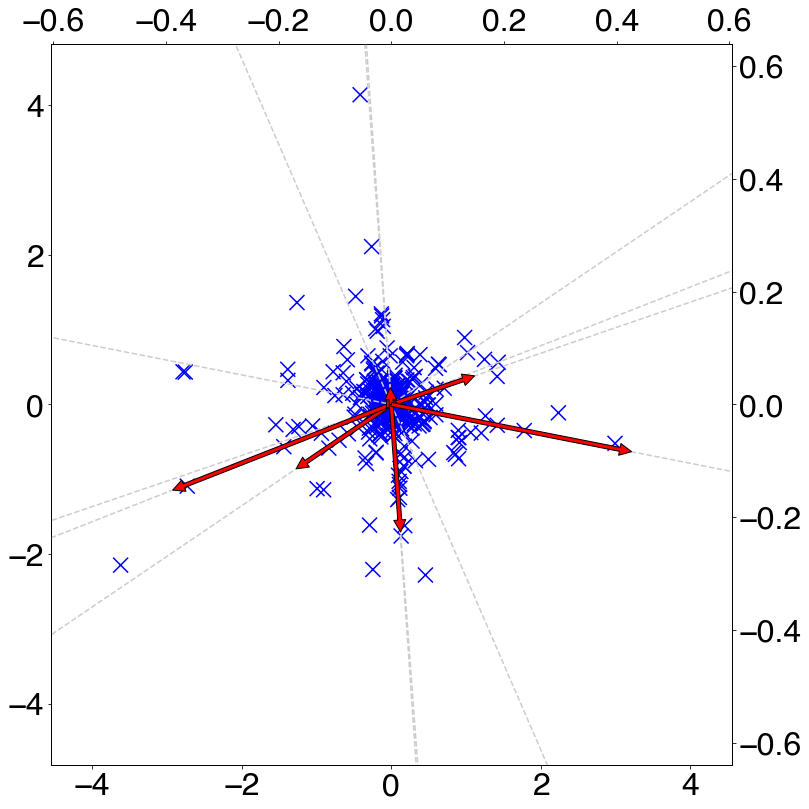

In [17]:
biplot_df = decomposition.plot_biplot(
    d, 
    pc_index1=d.get_kth_pc_for_phe_by_label(phenotype, 1), 
    pc_index2=d.get_kth_pc_for_phe_by_label(phenotype, 2), 
    biplot_phes=biplot_phes, 
    arrow_max_scale=1.5,    
    figsize=(12,12), 
    save=os.path.join(out_dir, 'Biplot_PTVs_PC{}xPC{}'.format(
        d.get_kth_pc_for_phe_by_label(phenotype, 1) + 1,
        d.get_kth_pc_for_phe_by_label(phenotype, 2) + 1,        
    ))
)

In [18]:
biplot_df

,phe,x,y,r,slope
4,high cholesterol,-0.002059,0.029825,0.029896,-14.484396
5,Nitrogen oxides air pollution; 2010,0.016626,-0.226373,0.226983,-13.615766
3,Eosinophill percentage,-0.007446,0.017209,0.018751,-2.311009
6,Lung cancer,0.426276,-0.083988,0.434471,-0.197026
2,Sodium in urine,0.147854,0.050535,0.156252,0.341788
1,Water intake,-0.387808,-0.152124,0.416577,0.392266
0,cholelithiasis/gall stones,-0.168820,-0.114383,0.203921,0.677544


In [14]:
variant_df = pd.read_csv(
    os.path.join(repo_dir, 'private_data', 'variant_and_gene_labels.tsv.gz'), 
    sep='\t', compression='gzip',
)
var2gene_dict = dict(zip(variant_df['label_var'], variant_df['label_gene']))


In [15]:
plotly.offline.iplot(decomposition.plotly_eigen_phe(
    d, 
    d.get_kth_pc_for_phe_by_label(phenotype, 1), 
    d.get_kth_pc_for_phe_by_label(phenotype, 2),
))



In [17]:
plotly.offline.iplot(decomposition.plotly_factor_var(
    d, 
    d.get_kth_pc_for_phe_by_label(phenotype, 1), 
    d.get_kth_pc_for_phe_by_label(phenotype, 2),
    var2gene_dict,
    90,
))



querying 1-2...done.
Finished.
querying 1-1...done.
Finished.
1 input query terms found no hit:
	['ENSG00000172381']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [ ]:
mg.querymany(
    [
        'ENSG00000267282', 'ENSG00000130202',
        'ENSG00000241388', 'ENSG00000135100',
    ], 
    scopes='ensembl.gene',
    fields='symbol', 
    species='human', 
    as_dataframe=True,
    df_index=False,
)